In [1]:
import pandas as pd
import numpy as np
import random

```{index} homicides
```

# JNB Lab Homicides in Chicago



<h4> Acknowledgements </h4>

This lab is an outcome of a collaboration in 2019-2021 between  Paul Isihara (Professor of Mathematics, Wheaton College (IL)) and a team at Flourishing Community Initiative of Sunshine Gospels Ministries which included Arnold Sojourner (FCI director), Joel Hamernick (SGM Director) and Evan Trowbridge (FCI Data Analyst)
 Dr. Paul Campbell (Editor, UMAP Journal) served as a statsitical consultant.

## Historical Context

Chicago has suffered over 8,000 homicides in the past 20 years, or more than 1 homicide per day on average. A number of historical factors have contributed to the current level of homicides in Chicago.

After slavery was abolished, racism in the form of segregationist Jim Crow Laws and white supremacy  led by the KKK contributed to the Great Migration of 6,000,000 black Americans who left their homes in the South and moved in large numbers to cities such as Chicago. Further racism occurred in the form of hatred in the industrial workplace, redlining which kept black Americans from home ownership, slum landlording which created sub-standard and overcrowded rental and school conditions, and gentrification which further displaced and forced black Americans into communities which experienced white flight, dis-investment, and loss of jobs.  As hope of a good education, honest employment, and decent living conditions disappeared, some were led into gangs and drugs.  Mass incarceration further exacerbated the family instability, economic hardship, and violence of predominantly black American areas of the city. 

```{index} data visualization
```

## DATA VISUALIZATION

1) Read in Homicide data for Cook County which was obtained from the Cook County Medical Examiner Case Archive https://datacatalog.cookcountyil.gov/Public-Safety/Medical-Examiner-Case-Archive/cjeq-bs86 on Feb 6, 2021, and stored in an Excel  file homicides.xlsx.  Drop rows that have missing data.

In [2]:
Hom=pd.read_excel('homicides.xlsx') #read data file
Hom=Hom[Hom["Manner of Death"]=='HOMICIDE']
Hom=Hom[["Date of Incident","Age","Gender","Race","Primary Cause","Residence City","Incident Zip Code"]]
Hom=Hom.dropna()
Hom.head(1)

,Date of Incident,Age,Gender,Race,Primary Cause,Residence City,Incident Zip Code
0,2017-02-26 10:48:00,23.0,Male,Black,MULTIPLE GUNSHOT WOUNDS,Chicago,60623.0


2) Extract the month and year of homicide incidents.

In [3]:
from datetime import datetime
Hom['new_date'] = [d.date() for d in Hom['Date of Incident']] 
dates=Hom['new_date'].values
year=[my_str.year for my_str in dates]
month=[my_str.month for my_str in dates]
day=[my_str.day for my_str in dates]
Hom['year'] = year
Hom['month'] = month
Hom['day'] = day
Hom.head(1)

,Date of Incident,Age,Gender,Race,Primary Cause,Residence City,Incident Zip Code,new_date,year,month,day
0,2017-02-26 10:48:00,23.0,Male,Black,MULTIPLE GUNSHOT WOUNDS,Chicago,60623.0,2017-02-26,2017,2,26


3) Get Chicago data, select the columns ["Age","Gender","Race","Primary Cause","Incident Zip Code","year","month","day"]  and use integer format

In [4]:
ChiHom=Hom[Hom["Residence City"]=='Chicago'] #get data for just Chicago
df=ChiHom[["Age","Gender","Race","Primary Cause","Incident Zip Code","year","month","day"]]
df=df.dropna()
df['year']=df['year'].astype(int)
df['month']=df['month'].astype(int)
df['day']=df['day'].astype(int)
df['Age']=df['Age'].astype(int)
df['Incident Zip Code']=df['Incident Zip Code'].astype(int)
df=df[df["year"]>2014]
df.head(1)

,Age,Gender,Race,Primary Cause,Incident Zip Code,year,month,day
0,23,Male,Black,MULTIPLE GUNSHOT WOUNDS,60623,2017,2,26


4) Get the homicide totals by year

In [5]:
df["year"].value_counts()

2016    669
2020    620
2017    566
2018    492
2019    433
2015    429
Name: year, dtype: int64

5) Sort the data by year

In [6]:
df=Hom
#Get All Cook County Homicides by Year
df15=df[df['year']==2015]
df16=df[df['year']==2016]
df17=df[df['year']==2017]
df18=df[df['year']==2018]
df19=df[df['year']==2019]
df20=df[df['year']==2020]
#Get Monthly Homicide Counts for Each Year
H15=df15["month"].value_counts().sort_index()
H16=df16["month"].value_counts().sort_index()
H17=df17["month"].value_counts().sort_index()
H18=df18["month"].value_counts().sort_index()
H19=df19["month"].value_counts().sort_index()
A19=(H15+H16+H17+H18+H19)/5
H20=df20["month"].value_counts().sort_index()

In [7]:
#Get All Cook County Homicides by Year
df15=df[df['year']==2015]
df16=df[df['year']==2016]
df17=df[df['year']==2017]
df18=df[df['year']==2018]
df19=df[df['year']==2019]
df20=df[df['year']==2020]
#Get Monthly Homicide Counts for Each Year
H15=df15["month"].value_counts().sort_index()
H16=df16["month"].value_counts().sort_index()
H17=df17["month"].value_counts().sort_index()
H18=df18["month"].value_counts().sort_index()
H19=df19["month"].value_counts().sort_index()
A19=(H15+H16+H17+H18+H19)/5
H20=df20["month"].value_counts().sort_index()

6) Plot the Homicides by Month

<IPython.core.display.Javascript object>


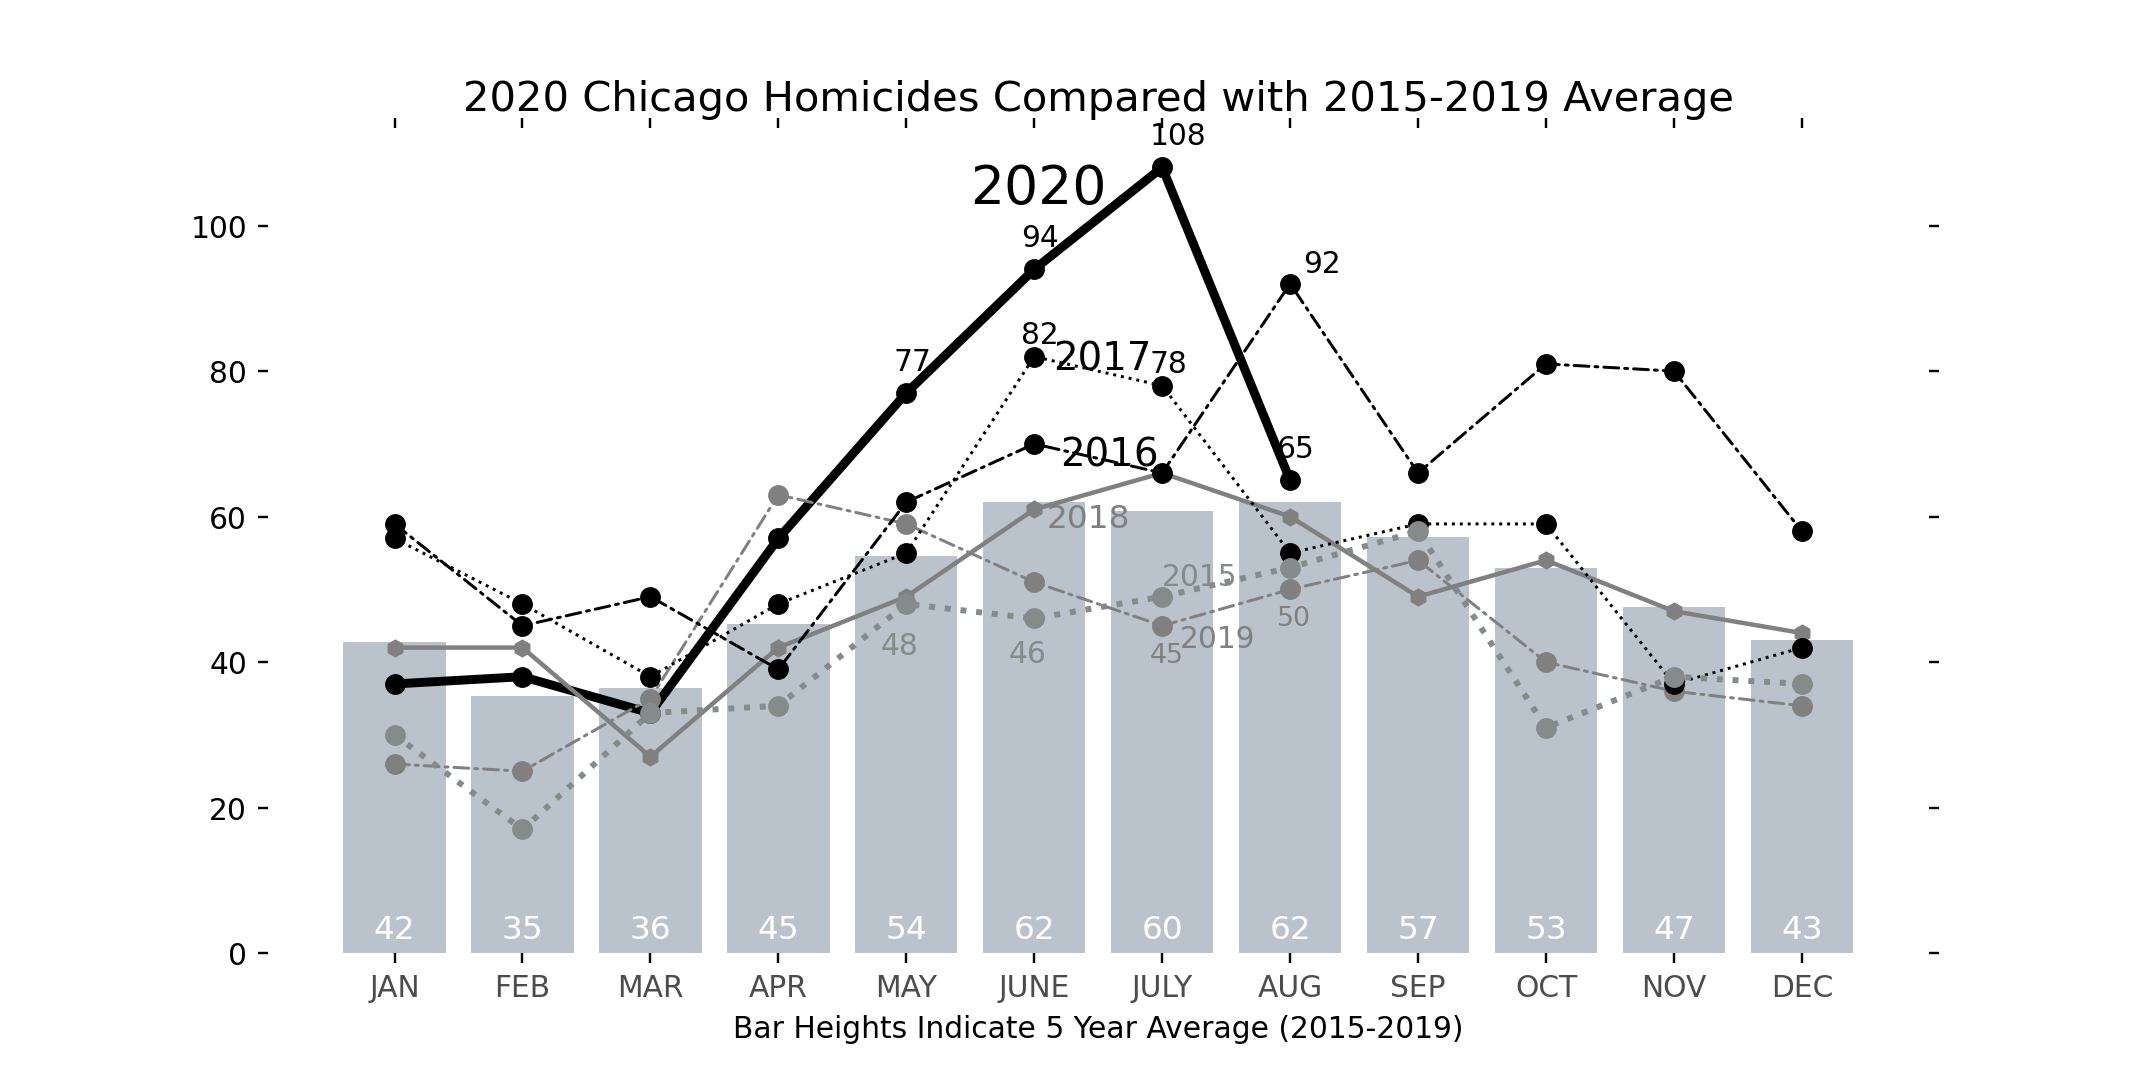

C:\Users\pisihara\AppData\Local\Temp\ipykernel_40192\1335885112.py:28: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(H19, 'o-',color='gray',linewidth=1,linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round')
C:\Users\pisihara\AppData\Local\Temp\ipykernel_40192\1335885112.py:33: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(H18, 'o-',color='gray',marker='h', markerfacecolor='gray', markeredgewidth=1,
C:\Users\pisihara\AppData\Local\Temp\ipykernel_40192\1335885112.py:37: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(H17, 'o-',color='k',linewidth=1,linestyle=':')
C:\Users\pisihara\AppData\Local\Temp\ipykern

In [8]:
#Make plots
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=[10,5])

classes=["JAN","FEB","MAR","APR","MAY","JUNE","JULY","AUG","SEP","OCT","NOV","DEC"]
ps = 1+np.arange(len(classes))
sps = A19
bars = plt.bar(ps, sps, align='center', linewidth=0, color='lightslategrey',alpha=.5)
plt.xticks(ps, classes, alpha=0.7)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
 
# directly label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, 2, str(int(bar.get_height())), ha='center', color='w', fontsize=11)

plt.plot(H20[0:8], 'o-',color='k',linewidth=3)
for i in np.arange(5,9,1):
    plt.text(i-.1,H20[i]+3.1, str(H20[i]),color='k')
plt.text(5.5,103,'2020',color='k',size=18)

plt.plot(H19, 'o-',color='gray',linewidth=1,linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round')
for i in [7,8]:
    plt.text(i-.1,H19[i]-5, str(H19[i]),color='gray',size=9)
plt.text(7.14,42,'2019',color='gray',size=10)

plt.plot(H18, 'o-',color='gray',marker='h', markerfacecolor='gray', markeredgewidth=1,
         markersize=5, markevery=1)
plt.text(6.1,58.5,'2018',color='gray',size=11)

plt.plot(H17, 'o-',color='k',linewidth=1,linestyle=':')
for i in [6,7]:
    plt.text(i-.1,H17[i]+1.75, str(H17[i]),color='k')
plt.text(6.15,80.1,'2017',color='k',size=13)

plt.plot(H16, 'o-',color='k',linewidth=1,linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round')
plt.text(8.1,H16[8]+1.6, str(H16[8]),color='k')
plt.text(6.2,67,'2016',color='k',size=13)

plt.plot(H15, 'o-',color='#838B8B',linewidth=2,linestyle=':')
plt.text(5.8,40, str(H15[6]),color='#838B8B')
plt.text(4.8,41, str(H15[5]),color='#838B8B')
plt.text(7,50.5,'2015',color='#838B8B',size=10)

plt.xlabel("Bar Heights Indicate 5 Year Average (2015-2019)")

plt.title("2020 Chicago Homicides Compared with 2015-2019 Average",size=14)
plt.savefig("JNB1.png")
plt.show()

```{index} Monte Carlo method
```

## Monte Carlo Analysis

The Monte Carlo method uses pseudo-random numbers for statistical analysis.  We will use this approach to create a histogram of homicide counts for 10,000 hypothetical months of  May based on probabilities of daily homicide counts based on data for the years 2015-2019. For example, we first record that May 1, 2015 had 3 homicides, May 2, had 0 homicides,..., May 31, 2019 had 5 homicides, and then make a frequency distribution called "maycount" using the numbers 3,0, ..., 5. We obtain in this way the empirical probability that there will be 0 homicides on a day in May is  0.219 since 21.9% of the days in May (for 2015-2019) had 0 homicides.  We then use the empirical probabilities and psuedo-random numbers tto generate a random sample of 31 homicide counts for May, and these daily counts to get a random monthly total for May. We repeat this 10,000 times and make a histogram of the results. 

1) Get the number of Chicago homicides in May 2020.

In [9]:
may=df[df["month"]==5]
may20=may[may["year"]==2020]
print("Chicago Homicides In May 2020: ",len(may20))

Chicago Homicides In May 2020:  77


2) Get the number of homicides which occured on each day of May  between 2015 and 2019.

In [10]:
maydf=may
maydf=maydf.reset_index(drop=True)
maycount=pd.Series(np.arange(0,155,1))
maycount[:]=0
j=0
for year in np.arange(2015,2020,1):
    for day in np.arange(1,32,1):
        for i in maydf.index:
            if maydf.loc[i,"day"]==day and maydf.loc[i,"year"]==year:
                maycount[j]=maycount[j]+1
        j=j+1
print(maycount[0:5])


0    5
1    0
2    1
3    0
4    2
dtype: int32


```{index} frequency distribution
```

3) Get frequency distributions for the number of homicides in a day

In [11]:
mm=maycount.max()
mayfreq=pd.Series(np.arange(0,mm+1,1))  #create a series with index the number of homicides and value equal to the frequency
mayfreq[:]=0
dm=maycount
for i in maycount.index:
    for j in np.arange(0,mm+1,1):
        if dm[i]==j:
            mayfreq[j]=mayfreq[j]+1
s=mayfreq.sum()
mayfreq=mayfreq/s
print(mayfreq)


0    0.200000
1    0.303226
2    0.219355
3    0.141935
4    0.083871
5    0.051613
dtype: float64


4) Do a Monte Carlo simulation for monthly homicide counts in May based on 31 random draws from the respective empirical distributions.

In [12]:
import random
n = random.random()
nummonths=10000
numdays=31*nummonths
maydaytotal=pd.Series(np.arange(0,numdays,1))
maydaytotal[:]=0

for i in np.arange(0,numdays,1):
    x=random.random()
    exit=0
    cum=0
    for j in mayfreq.index:
        if x< cum+mayfreq[j] and exit==0:
            maydaytotal[i]=j
            exit=1
        else:
            cum=cum+mayfreq[j]


maymonths=pd.Series(np.arange(0,nummonths,1))
maymonths[:]=0
i=0
for month in np.arange(0,nummonths,1):
    sum=0
    for j in np.arange(0,31,1):
        sum=sum+maydaytotal[i]
        i=i+1
    maymonths[month]=sum
    month=month+1


```{index} histogram
```

5) Make a histogram of the frequency distribution for May.

<IPython.core.display.Javascript object>


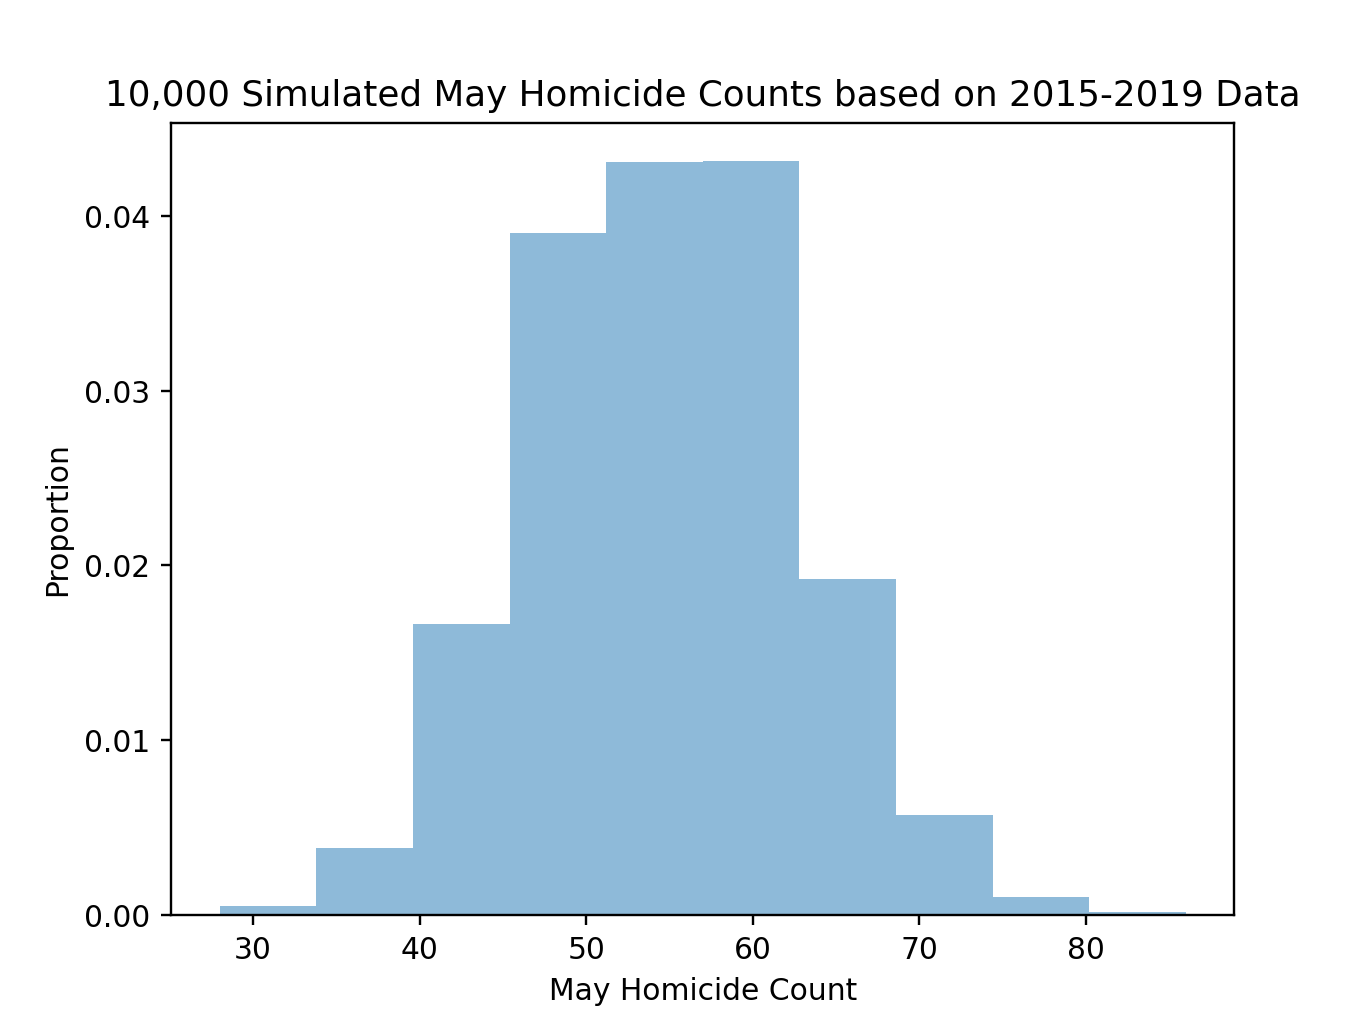

Text(0.5, 1.0, '10,000 Simulated May Homicide Counts based on 2015-2019 Data')

In [13]:
import matplotlib.pyplot as plt
#Make Histogram
fig, ax = plt.subplots()
n,bins,patches = ax.hist(maymonths, bins=10,density=1,alpha=.5)
plt.xlabel("May Homicide Count")
plt.ylabel("Proportion")
plt.title("10,000 Simulated May Homicide Counts based on 2015-2019 Data")

6) Find the empirical p-value of getting at least 77 homicides (the number in May 2020.)

In [14]:
maycount=maymonths[maymonths>=77]
pmay=len(maycount)/10000
print("Probability that a random draw of 31 days from May 2015-2020 distibution results in 59 or more homicides:",pmay)

Probability that a random draw of 31 days from May 2015-2020 distibution results in 59 or more homicides: 0.0036


:::{admonition} Exercises
1) a) Repeat the above analysis to obtain a histogram for July. 

b) Find the empirical p-value of getting at least 108 homicides (the number in July 2020.)

2) a) Make a histogram of the difference July homicide count - May homicide count.

b) Find the probability that July will have at least n more homicides than May $(0\le n \le 20)$. Make a plot of these probabilities.

c) Estimate the probability that there will be 20 more homicdes in July than in May.
:::